# Nous simulons les montants de TICPE payés par un ménage selon le type de véhicules dont il dispose. Nous prenons un ménage dont les dépenses annuelles en carburants s'élèveraient à 1000 euros. C'est en dessous de la moyenne de nos samples (plutôt autour de 1500 euros).

# Import de modules généraux

In [6]:
import datetime
import pandas as pd
import seaborn


# Import de modules et fonctions spécifiques à OpenFisca

In [7]:
from openfisca_france_indirect_taxation.tests import base
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_line, save_dataframe_to_graph


# Import d'une nouvelle palette de couleurs

In [8]:
seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Définition d'un cas type et de son exposition à la TICPE entre 2000 et 2013

In [9]:
index = range(2000, 2014)
columns = ['si une essence et une diesel', 'si seulement vehicules diesel', 'si seulement vehicules essence']
depenses_ticpe_pour_1000_euros_carbu = pd.DataFrame(index = index, columns = columns)

for element in columns:
    if element == 'si seulement vehicules essence':
        dies = 0
    else:
        dies = 1
    if element == 'si seulement vehicules diesel':
        ess = 0
    else:
        ess = 1
    for year in range(2000, 2014):
        year = year
        simulation = base.tax_benefit_system.new_scenario().init_single_entity(
            period = year,
            personne_de_reference = dict(
                birth = datetime.date(year - 40, 1, 1),
                ),
            menage = dict(
                depenses_carburants = 1000,
                veh_essence = ess,
                veh_diesel = dies,
                ),
            ).new_simulation(debug = True)

        depenses_ticpe_pour_1000_euros_carbu.loc[depenses_ticpe_pour_1000_euros_carbu.index == year, element] = \
            simulation.calculate('ticpe_totale')


# Réalisation d'un graphique

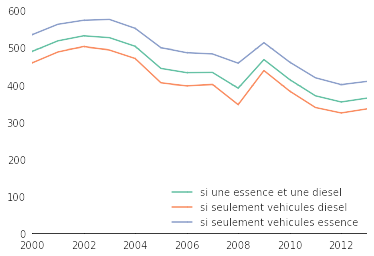

In [10]:
graph_builder_line(depenses_ticpe_pour_1000_euros_carbu)
